In [1]:
import os
import certifi
import urllib3  # For handling https certificate verification 
import requests
import zipfile
import shutil
import json
import time
import sys
import cv2
import numpy as np
import pandas as pd
from scipy.signal import convolve2d
import scipy.ndimage as ndimage
import subprocess
from PIL import Image
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
from keras.layers import LeakyReLU
from keras.regularizers import l2
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


2022-12-27 08:25:24.063427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 08:25:26.560830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/munch/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-27 08:25:26.561021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/munch/.local/lib/python3.10/site-packages/cv2/../../lib64:


In [3]:
train_damage_dir = 'data/train_another/damage'
validation_damage_dir = 'data/validation_another/damage'
test_damage_dir = 'data/test/damage'
test_another_damage_dir = 'data/test_another/damage'


train_nodamage_dir = 'data/train_another/no_damage'
validation_nodamage_dir = 'data/validation_another/no_damage'
test_nodamage_dir = 'data/test/no_damage'
test_another_nodamage_dir = 'data/test_another/no_damage'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    'data/train_another', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'data/validation_another',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(
    'data/test_another',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
)       

Found 9000 images belonging to 2 classes.


In [6]:
model_1 = load_model('model.h5')

2022-12-27 08:25:34.220349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-27 08:25:34.383466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-27 08:25:34.383533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-27 08:25:34.384924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

(20, 150, 150, 3)
[1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


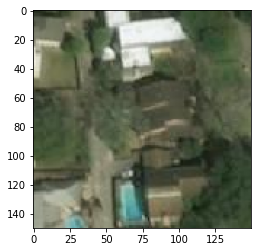

(20, 150, 150, 3)
[1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.]


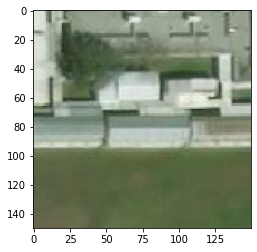

(20, 150, 150, 3)
[0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


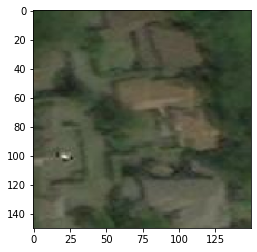

(20, 150, 150, 3)
[1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.]


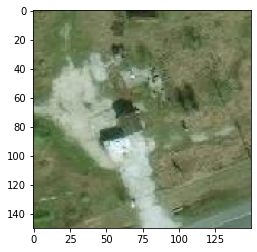

(20, 150, 150, 3)
[0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]


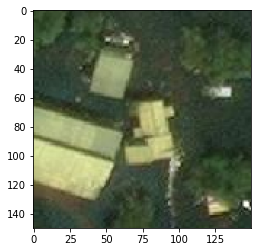

In [7]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    print(label)
    plt.imshow(img[0])
    plt.show()

In [14]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        plt.subplots_adjust(bottom=0., right=0.8, top=0.9)
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

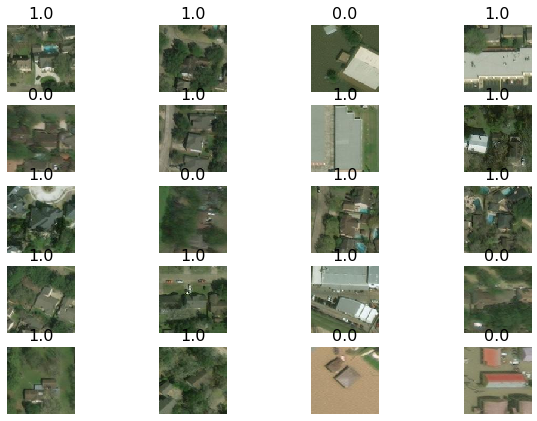

In [15]:
imgs, labels = next(train_generator)
plots(imgs, titles=labels, rows = 5)

In [19]:
predictions = model_1.predict_generator(test_data, steps=1, verbose=0)


/tmp/ipykernel_11204/55855103.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model_1.predict_generator(test_data, steps=1, verbose=0)
2022-12-26 08:02:15.079615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


In [20]:
print(predictions)

[[2.60055736e-02]
 [2.29191803e-03]
 [8.31392594e-03]
 [5.92821501e-02]
 [9.99977827e-01]
 [4.13394300e-04]
 [1.37858512e-03]
 [7.84049630e-01]
 [8.68652773e-04]
 [1.21031795e-02]
 [6.30269002e-04]
 [1.14785239e-01]
 [1.63664436e-03]
 [4.03926853e-04]
 [1.25326039e-02]
 [9.96603489e-01]
 [1.71367988e-01]
 [1.13937140e-01]
 [1.69596940e-04]
 [1.07964082e-03]]


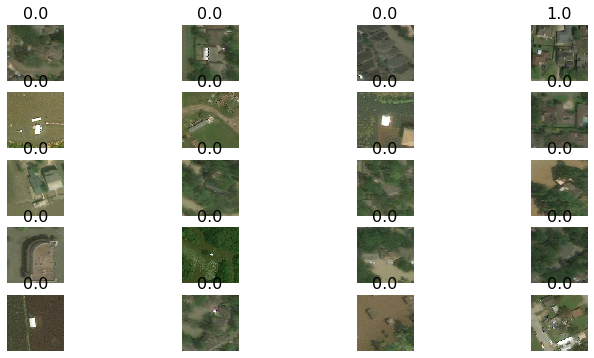

In [23]:
imgs, labels = next(test_data)
plots(imgs, titles=labels, rows = 5)

In [17]:
import pandas as pd
from pathlib import Path


In [18]:
input_path = 'data'
image_df = pd.DataFrame({'path': list(Path(input_path).glob('**/*.jp*g'))})

image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1]))
image_df['path'] = image_df['path'].map(lambda x: str(x))

In [19]:
image_df

,path,damage,data_split,location,lon,lat
0,data/test/damage/-93.548123_30.900623.jpeg,damage,test,-93.548123_30.900623,-93.548123,30.900623
1,data/test/damage/-93.560128_30.894917.jpeg,damage,test,-93.560128_30.894917,-93.560128,30.894917
2,data/test/damage/-93.578271_30.779923999999998...,damage,test,-93.578271_30.779923999999998,-93.578271,30.779924
3,data/test/damage/-93.590598_30.694956.jpeg,damage,test,-93.590598_30.694956,-93.590598,30.694956
4,data/test/damage/-93.604017_30.793719.jpeg,damage,test,-93.604017_30.793719,-93.604017,30.793719
...,...,...,...,...,...,...
22995,data/validation_another/no_damage/-97.000188_2...,no_damage,validation_another,-97.000188_28.879426000000002,-97.000188,28.879426
22996,data/validation_another/no_damage/-97.000443_2...,no_damage,validation_another,-97.000443_28.859588000000002,-97.000443,28.859588
22997,data/validation_another/no_damage/-97.000872_2...,no_damage,validation_another,-97.000872_28.789737,-97.000872,28.789737
22998,data/validation_another/no_damage/-97.000945_2...,no_damage,validation_another,-97.000945_28.846922999999997,-97.000945,28.846923


In [20]:
train = image_df[image_df['data_split']=='train_another']
test = image_df[image_df['data_split']=='test_another']
val = image_df[image_df['data_split']=='validation_another']

Text(0, 0.5, 'latitude')

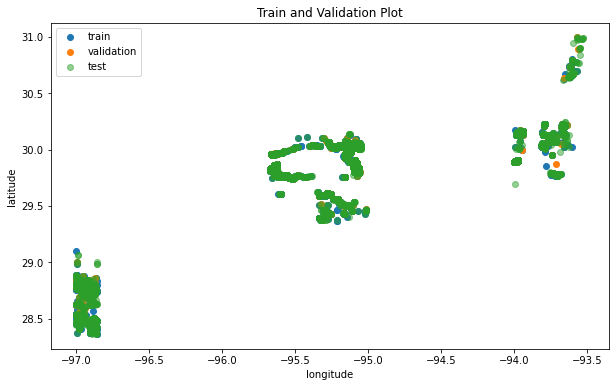

In [22]:
fig, ax = plt.subplots( figsize=(10,6))
plt.scatter(train['lon'], train['lat'], label='train')
plt.scatter(val['lon'], val['lat'], label='validation')
plt.scatter(test['lon'], test['lat'], label='test', alpha=0.5)
plt.title('Train and Validation Plot')
plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')

In [23]:
image_dmg = image_df[image_df['damage']=='damage']
image_nodmg = image_df[image_df['damage']=='no_damage']
image_dmg.reset_index(drop=True,inplace=True)
image_nodmg.reset_index(drop=True,inplace=True)

In [32]:
import geopandas
fp = "shapes/tl_2016_48_cousub.shp"
data = geopandas.read_file(fp)


In [ ]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader(fp)


<Figure size 432x288 with 0 Axes>

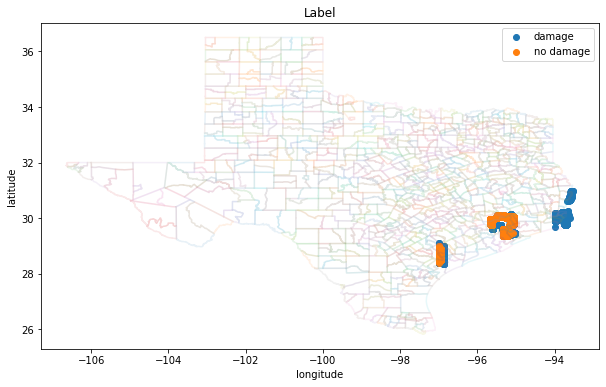

In [42]:
plt.figure()
fig, ax = plt.subplots( figsize=(10,6))
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y, alpha = 0.1)
plt.scatter(image_dmg['lon'], image_dmg['lat'], color='C0',  label='damage')
plt.scatter(image_nodmg['lon'], image_nodmg['lat'], color='C1',  label='no damage')
plt.title('Label')
plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()